In [1]:
import os
import h2o
from h2o.automl import H2OAutoML

In [2]:
os.chdir('..')

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,1 day 0 hours 45 mins
H2O cluster timezone:,Asia/Dubai
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.11
H2O cluster version age:,6 days
H2O cluster name:,H2O_from_python_jpf_nvd96g
H2O cluster total nodes:,1
H2O cluster free memory:,1.607 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [5]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file('ENG_DATA/SELECTED/12-10_hedon_train.csv')
test = h2o.import_file('ENG_DATA/SELECTED/12-10_hedon_test.csv')
factor_columns = ['full_address',
 'street_name',
 'type',
 'neighborhood']

#remove column index 
train.columns.remove("C1")
test.columns.remove("C1")

# Identify predictors and response
x = train.columns
y = "sale_price"
x.remove(y)
x.remove("C1")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
for f in factor_columns: 
    train[f] = train[f].asfactor()
    test[f] = test[f].asfactor()

In [7]:
# Run AutoML for 2 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=1, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
XGBoost_1_AutoML_20191212_112938,2.83514e+11,532460,2.83514e+11,216729,0.186837


In [8]:
aml.training_info

{'creation_epoch': '1576135778',
 'start_epoch': '1576135778',
 'stop_epoch': '1576136010',
 'duration_secs': '232'}

In [9]:
aml.download_mojo(path='Models/h20-leader-12-12-hedon.mojo')

'/Users/37138/cs/capstone/Models/h20-leader-12-12-hedon.mojo'

In [10]:
aml.leader

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_20191212_112938


Model Summary: 


,,number_of_trees
0,,144.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 56506414646.45121
RMSE: 237710.77940735294
MAE: 135399.98544543108
RMSLE: 0.13664259807208573
Mean Residual Deviance: 56506414646.45121

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 283513797722.43805
RMSE: 532460.1372144567
MAE: 216729.07614634934
RMSLE: 0.1868368154053054
Mean Residual Deviance: 283513797722.43805

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,216728.52,6617.781,227321.62,216122.05,212317.5,210226.03,217655.38
1,mean_residual_deviance,2.83504738E11,1.02458581E11,4.55691502E11,2.33899672E11,2.29592941E11,2.97220997E11,2.01118515E11
2,mse,2.83504738E11,1.02458581E11,4.55691502E11,2.33899672E11,2.29592941E11,2.97220997E11,2.01118515E11
3,r2,0.84199935,0.037839375,0.78256756,0.84349054,0.8699341,0.83506614,0.8789384
4,residual_deviance,2.83504738E11,1.02458581E11,4.55691502E11,2.33899672E11,2.29592941E11,2.97220997E11,2.01118515E11
5,rmse,526296.4,90255.71,675049.25,483631.75,479158.56,545179.75,448462.4
6,rmsle,0.18682715,0.0021139134,0.18851915,0.18849963,0.1833355,0.18697646,0.18680505



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2019-12-12 11:32:47,3 min 8.937 sec,0.0,1.912814e+06,1.376509e+06,3.658857e+12
1,,2019-12-12 11:32:48,3 min 10.359 sec,5.0,1.534424e+06,1.071766e+06,2.354457e+12
2,,2019-12-12 11:32:50,3 min 11.775 sec,10.0,1.242245e+06,8.358094e+05,1.543173e+12
3,,2019-12-12 11:32:51,3 min 13.190 sec,15.0,1.017428e+06,6.528922e+05,1.035161e+12
4,,2019-12-12 11:32:52,3 min 14.450 sec,20.0,8.448000e+05,5.119352e+05,7.136870e+11
5,,2019-12-12 11:32:54,3 min 15.829 sec,25.0,7.129361e+05,4.051060e+05,5.082779e+11
6,,2019-12-12 11:32:55,3 min 17.210 sec,30.0,6.087441e+05,3.257611e+05,3.705694e+11
7,,2019-12-12 11:32:57,3 min 18.581 sec,35.0,5.317211e+05,2.684574e+05,2.827273e+11
8,,2019-12-12 11:32:58,3 min 20.094 sec,40.0,4.724262e+05,2.281523e+05,2.231865e+11
9,,2019-12-12 11:32:59,3 min 21.511 sec,45.0,4.232685e+05,2.000208e+05,1.791562e+11



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,latitude,6.954993e+16,1.000000,0.320752
1,baths,6.017133e+16,0.865153,0.277500
2,beds,1.402059e+16,0.201590,0.064661
3,area,1.247760e+16,0.179405,0.057545
4,on_market_date,1.125692e+16,0.161854,0.051915
5,elevation,4.824756e+15,0.069371,0.022251
6,longitude,4.519886e+15,0.064988,0.020845
7,rooms,4.141323e+15,0.059545,0.019099
8,sale_date,4.058599e+15,0.058355,0.018718
9,street_name.BroadwaySt,4.042838e+15,0.058129,0.018645



See the whole table with table.as_data_frame()


In [11]:
preds = aml.leader.predict(test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


/Users/37138/anaconda3/lib/python3.6/site-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'full_address' has levels not trained on: [1 Gabilan Way, San Francisco, CA 94132, 1 Ignacio Ave, San Francisco, CA 94124, 1 Lansdale Ave, San Francisco, CA 94127, 1 Lansdale, San Francisco, CA 94127-1608, 1 Las Villas Ct, San Francisco, CA 94124-2781, 1 Nebraska St, San Francisco, CA 94110, 1 Putnam St, San Francisco, CA 94110, 1 Roanoke, San Francisco, CA 94131, 1 Seymour, San Francisco, CA 94115, 1 Southern Heights Ave, San Francisco, CA 94107-2709, 1 Stanford Heights Ave, San Francisco, CA 94127, 1 West View Ave, San Francisco, CA 94134, 10 22nd Ave, San Francisco, CA 94121, 10 Apollo St, San Francisco, CA 94124, 10 Canyon Dr, San Francisco, CA 94112-4530, 10 Chenery, San Francisco, CA 94131, 10 Cumberland St, San Francisco, CA 94110-1525, 10 De Soto, San Francisco, CA 94127, 10 Deming St, San Francisco, CA 94114-1823, 10 Linares Ave, San Francisco, CA 94116, 10 Lunado Way,

/Users/37138/anaconda3/lib/python3.6/site-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'views' has levels not trained on: [BAY,BYBR,GGTE,SFRN, BAY,BYBR,SFRN,DWNT, BAY,GRDN,HILL,TWNP, BAY,GRDN,WOOD,CNYN, BAY,OCEN,HILL, BAY,SFRN,MNTN, BAY,SFRN,PARK, BAY,SFRN,TWNP,CNYN,VALY, BAY,WOOD,HILL,MNTN, BYBR,DWNT,HILL, BYBR,SFRN,DWNT, CTYL,BAY,BYBR,SFRN,DWNT,HILL,MTDB, CTYL,BAY,BYBR,SFRN,DWNT,TWNP, CTYL,BAY,BYBR,SFRN,HILL, CTYL,BAY,GGTE,SFRN,DWNT, CTYL,BAY,GGTE,SFRN,MNTN, CTYL,BAY,PARK,TWNP, CTYL,BAY,SFRN,DWNT,GRDN,MNTN,MTDB, CTYL,BAY,SFRN,DWNT,MNTN,TWNP, CTYL,BAY,SFRN,DWNT,PARK,HILL,TWNP, CTYL,BAY,SFRN,DWNT,TWNP, CTYL,BAY,SFRN,GRDN,MNTN, CTYL,BAY,SFRN,PARK,HILL, CTYL,BAY,SFRN,PARK,HILL,CNYN, CTYL,BAY,SFRN,WOOD,HILL,TWNP, CTYL,BYBR,OCEN,GRDN,MNTN, CTYL,BYBR,SFRN,DWNT,TWNP, CTYL,BYBR,SFRN,GLFC,MNTN, CTYL,DWNT,WOOD, CTYL,GGTE,MNTN, CTYL,GGTE,PARK,GLFC, CTYL,GGTE,SFRN,FRST, CTYL,GGTE,SFRN,OCEN, CTYL,GGTE,SFRN,PARK,GRDN,HILL,TWNP, CTYL,GRDN,HILL,VALY, CTYL,GRDN,WOOD,TWNP, CTYL,O

/Users/37138/anaconda3/lib/python3.6/site-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'street_name' has levels not trained on: [31st , 34th , 42nd St, 47th St, 48th , Arco , Arco Way, Armstrong , Arroyo , Ashton , Avalon , Balboa Ave, Balmy St, Bennington , Bitting Ave, Brentwood , Britton , Broderick , Brumiss Ter, Cabrillo Ave, Caine , Caine St, Camellia Ave, Cascade , Clarendon , Collins , Conkling , Country Club , Dashiell Hammett St, De Soto , Del Vale St, Deming Ave, Detroit , Devonshire , Diana St, Digby St, Dolores Ter, Elk , Esquina , Eucalyptus , Exeter , Funston St, Garcia , Getz St, Gillette , Greenwich Ct, Guerrero , Hanover , Havelock Ave, Hayes , Heather Ave, Homestead , Ignacio Ave, Jerrold , Jules , Kissling , Knott Ct, Lamartine , Lansdale , Las Villas , Leavenworth , Ledyard , Lincoln Ct, Linda , Madrid Sq, McKinnon Aly, Melba Ave, Mill , Minnesota St, Monticello , Nadell Ct, Navajo St, Oak , Oakwood St, Onondaga , Orben , Otsego , Parnassus ,

In [12]:
preds['sale_price'] = test['sale_price']

In [13]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score
import numpy as np

In [14]:
df_pred = preds.as_data_frame()

In [15]:
models = {}

In [16]:
def getMetrics(name, y_pred_, y_test_):
    metrics = {
        "r2": r2_score(y_pred_, y_test_), 
        "mean_absolute_error": mean_absolute_error(y_pred_, y_test_) / np.mean(y_test_), 
        "median_absolute_error" :median_absolute_error(y_pred_, y_test_) / np.mean(y_test_),
        "mean_abs_perc_error" : np.mean(np.abs((y_pred_ - y_test_) / y_test_)) * 100
    }
    models[f"{name}"] = metrics

In [17]:
getMetrics("12-12-hedon-automl", df_pred["predict"], df_pred["sale_price"])

In [18]:
models

{'12-12-hedon-automl': {'r2': 0.8535078504215857,
  'mean_absolute_error': 0.14988613096905778,
  'median_absolute_error': 0.07032241610751117,
  'mean_abs_perc_error': 14.06040759637597}}

In [16]:
df_pred

,predict,sale_price
0,6.712208e+05,665000
1,1.162479e+06,1100000
2,7.236932e+05,700000
3,2.945670e+06,2925000
4,1.476744e+06,1425000
...,...,...
4739,2.510536e+06,2350000
4740,1.641586e+06,1505000
4741,1.905196e+06,1900000
4742,1.332332e+06,1268000


In [21]:
r2_score(df_pred["predict"], df_pred["sale_price"])

0.8403784505863039

In [20]:
df_pred["pct_err"] = ((df_pred["predict"] - df_pred["sale_price"]) / df_pred["sale_price"]) *100

In [21]:
df_pred["pct_err"].describe()

count    4744.000000
mean        1.391958
std        13.047760
min       -65.284841
25%        -5.040566
50%         0.276401
75%         6.171786
max       321.612756
Name: pct_err, dtype: float64

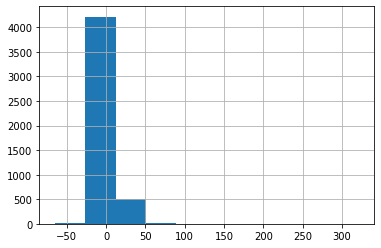

In [22]:
df_pred["pct_err"].hist()

In [ ]:
df_pred.to_csv("ENG_DATA/PREDICTED/12-10_df_h20_leader_predictions_no_list.csv")